<a href="https://colab.research.google.com/github/sabill/MLCC-Project/blob/master/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coba data yg klasifikasi (joint 2019 dr kaggle)

In [0]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import feature_column
#from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
uploaded = files.upload()
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

train_df.head()

Saving train.csv to train (3).csv


,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,campur
1,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,campur
2,3,1.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,campur
3,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,campur
4,5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur


Data Preprocessing

In [4]:
#prepocessing data
train_df.isnull().sum()

id                0
fac_1            63
fac_2            74
fac_3            62
fac_4            71
fac_5            72
fac_6            64
fac_7            78
fac_8            68
poi_1            67
poi_2            67
poi_3            86
size             68
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

In [0]:
#fill null data (fac_1 until fac_8) with mode
for column in train_df.columns[1:9]:
  train_df[column] = train_df[column].fillna(train_df[column]).mode()[0]

In [6]:
train_df.isnull().sum()

id                0
fac_1             0
fac_2             0
fac_3             0
fac_4             0
fac_5             0
fac_6             0
fac_7             0
fac_8             0
poi_1            67
poi_2            67
poi_3            86
size             68
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

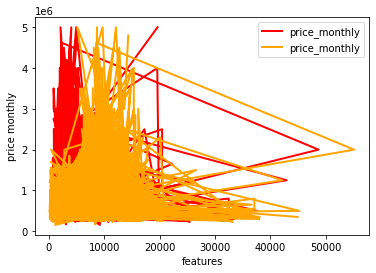

In [7]:
#Y = train_df['price_monthly']
plt.plot('poi_1', 'price_monthly', data = train_df, marker='', color='red', linewidth=2)
plt.plot('poi_2', 'price_monthly', data = train_df, marker='', color='orange', linewidth=2)

plt.xlabel('features')
plt.ylabel('price monthly')
plt.legend()

In [0]:
#fill null data based on ratio with price monthly
train_df['poi_1'] = train_df['poi_1'].fillna(train_df['poi_1'].mean())
train_df['poi_2'] = train_df['poi_2'].fillna(train_df['poi_2'].mean())
train_df['poi_3'] = train_df['poi_3'].fillna(train_df['poi_3'].mean())
train_df['size'] = train_df['size'].fillna(train_df['size'].mean())

In [9]:
train_df.head()

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,campur
1,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,campur
2,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,campur
3,4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,campur
4,5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur


In [10]:
train_df.isnull().sum()

id                0
fac_1             0
fac_2             0
fac_3             0
fac_4             0
fac_5             0
fac_6             0
fac_7             0
fac_8             0
poi_1             0
poi_2             0
poi_3             0
size              0
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

In [0]:
# def proportion(atributs, labels):
#   atribut = 

In [0]:
train_df['room_count'] = train_df['room_count'].fillna(train_df['room_count'].mean())
train_df['price_monthly'] = train_df['price_monthly'].fillna(train_df['price_monthly'].mean())

In [13]:
train_df.head()

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,campur
1,2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,campur
2,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,campur
3,4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,campur
4,5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur


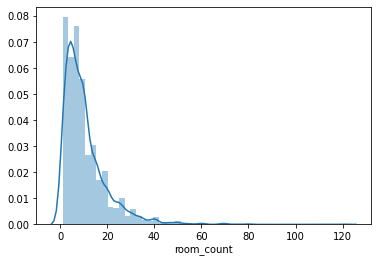

In [14]:
sns.distplot(train_df['room_count']);

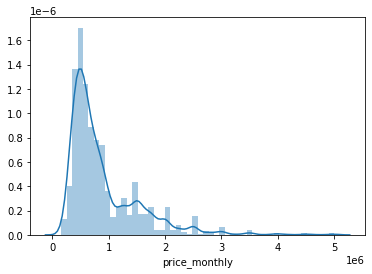

In [15]:
sns.distplot(train_df['price_monthly'])

In [0]:
def detect_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    iqr = q3 - q1
    rub = q3 + 1.5*iqr
    rlb = q1 - 1.5*iqr

    outlier = (data[column] < rlb) | (data[column] > rub)
    
    return data[outlier]

In [21]:
detect_outlier(train_df, 'price_monthly')

,id,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
4,5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur
8,9,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4835.0,8490.0,3618.0,20.00,4000000.0,8.0,4,putri
25,26,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2619.0,10326.0,688.0,16.00,2250000.0,46.0,44,campur
26,27,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3465.0,10139.0,1554.0,12.00,2200000.0,27.0,13,campur
55,56,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3213.0,9851.0,1513.0,20.00,3000000.0,2.0,6,campur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,3080,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3371.0,7739.0,5417.0,20.00,2300000.0,7.0,12,campur
3080,3081,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3313.0,7648.0,5319.0,20.00,2500000.0,7.0,14,campur
3265,3266,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,2210.0,11298.0,649.0,18.00,3000000.0,1.0,16,putri
3289,3290,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,3393.0,6930.0,3921.0,18.96,2200000.0,2.0,1,putri


In [0]:
gender_dict =  {
    'gender' : {
        'putra' : 0,
        'putri' : 1,
        'campur' : 2
    }
}

train_df.replace(gender_dict, inplace=True)

In [46]:
train_df['gender']

0       2
1       2
2       2
3       2
4       2
       ..
3288    1
3289    1
3290    2
3291    1
3292    0
Name: gender, Length: 3293, dtype: int64

In [0]:
train_features = train_df.loc[:,'fac_1':'total_call']
train_label = train_df.loc[:,'gender':]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.20, random_state=42)

In [0]:
input_layer = Input(shape=(train_features.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(train_label.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])



In [39]:
train_label.shape

(3293, 1)

In [51]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 15)]              0         
_________________________________________________________________
dense_11 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 411
Trainable params: 411
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.3)

Epoch 1/50
231/231 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5214 - val_loss: 0.0000e+00 - val_acc: 0.5133
Epoch 2/50
231/231 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5214 - val_loss: 0.0000e+00 - val_acc: 0.5133
Epoch 3/50
231/231 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5214 - val_loss: 0.0000e+00 - val_acc: 0.5133
Epoch 4/50
231/231 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5214 - val_loss: 0.0000e+00 - val_acc: 0.5133
Epoch 5/50
231/231 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5214 - val_loss: 0.0000e+00 - val_acc: 0.5133
Epoch 6/50
231/231 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5214 - val_loss: 0.0000e+00 - val_acc: 0.5133
Epoch 7/50
231/231 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc: 0.5214 - val_loss: 0.0000e+00 - val_acc: 0.5133
Epoch 8/50
231/231 [

In [56]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

21/21 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - acc: 0.5493
Test Score: 0.0
Test Accuracy: 0.5493171215057373


In [54]:
score

[0.0, 0.5493171215057373]